In [10]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')

In [11]:
#  Loading dataset
df = pd.read_csv("StudentPerformanceFactors.csv")

# Dataset information
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
display(df.head())
print("\nMissing values:")
print(df.isnull().sum())
print("\nDataset Description:")
print(df.describe())

Dataset Shape: (6607, 20)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_In

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Yes                  0           Low          Medium   
1             Yes                  2        Medium          Medium   
2             Yes                  2        Medium          Medium   
3             Yes                  1        Medium          Medium   
4             Yes                  3        Medium            High   

  School_Type Peer_Influence  Physical_Activity Learning_Disabilities  \
0      Public       Positive                  3                    No   
1      Public       Negative                  4                    No   
2      Public        Neutral                  4                    No   
3      Public       Negative                  4                    No   
4      Public        Neutral                  4                    No   

  Parental_Education_Level Distance_from_Home  Gender  Exam_Score  
0              High School               Near    Male          67  
1                  College           Moderate  Female          61  
2             Postgraduate               Near    Male          74  
3              High School           Moderate    Male          71  
4                  College               Near  Female          70


Missing values:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Dataset Description:
       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000

In [12]:
# Data Cleaning
print("Data types:")
print(df.dtypes)


print("\nUnique values in 'Teacher_Quality':", df['Teacher_Quality'].unique())
print("Unique values in 'Parental_Education_Level':", df['Parental_Education_Level'].unique())
print("Unique values in 'Distance_from_Home':", df['Distance_from_Home'].unique())

# Numerical columns (based on data type and actual content)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Remove Exam_Score from numerical features as it's our target
num_cols.remove('Exam_Score')

# Categorical columns (object type and any other non-numeric)
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical columns: {num_cols}")
print(f"Categorical columns: {cat_cols}")

# Handling missing values
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Applying imputation
df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# Verify no missing values remain
print("\nMissing values after imputation:")
print(df.isnull().sum())

#  Label Encoding
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str)) 
    label_encoders[col] = le

print("\nCategorical columns encoded successfully")

Data types:
Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

Unique values in 'Teacher_Quality': ['Medium' 'High' 'Low' nan]
Unique values in 'Parental_Education_Level': ['High School' 'College' 'Postgraduate' nan]
Unique values in 'Distance_from_Home': ['Near' 'Moderate' 'Far' nan]

Numerical

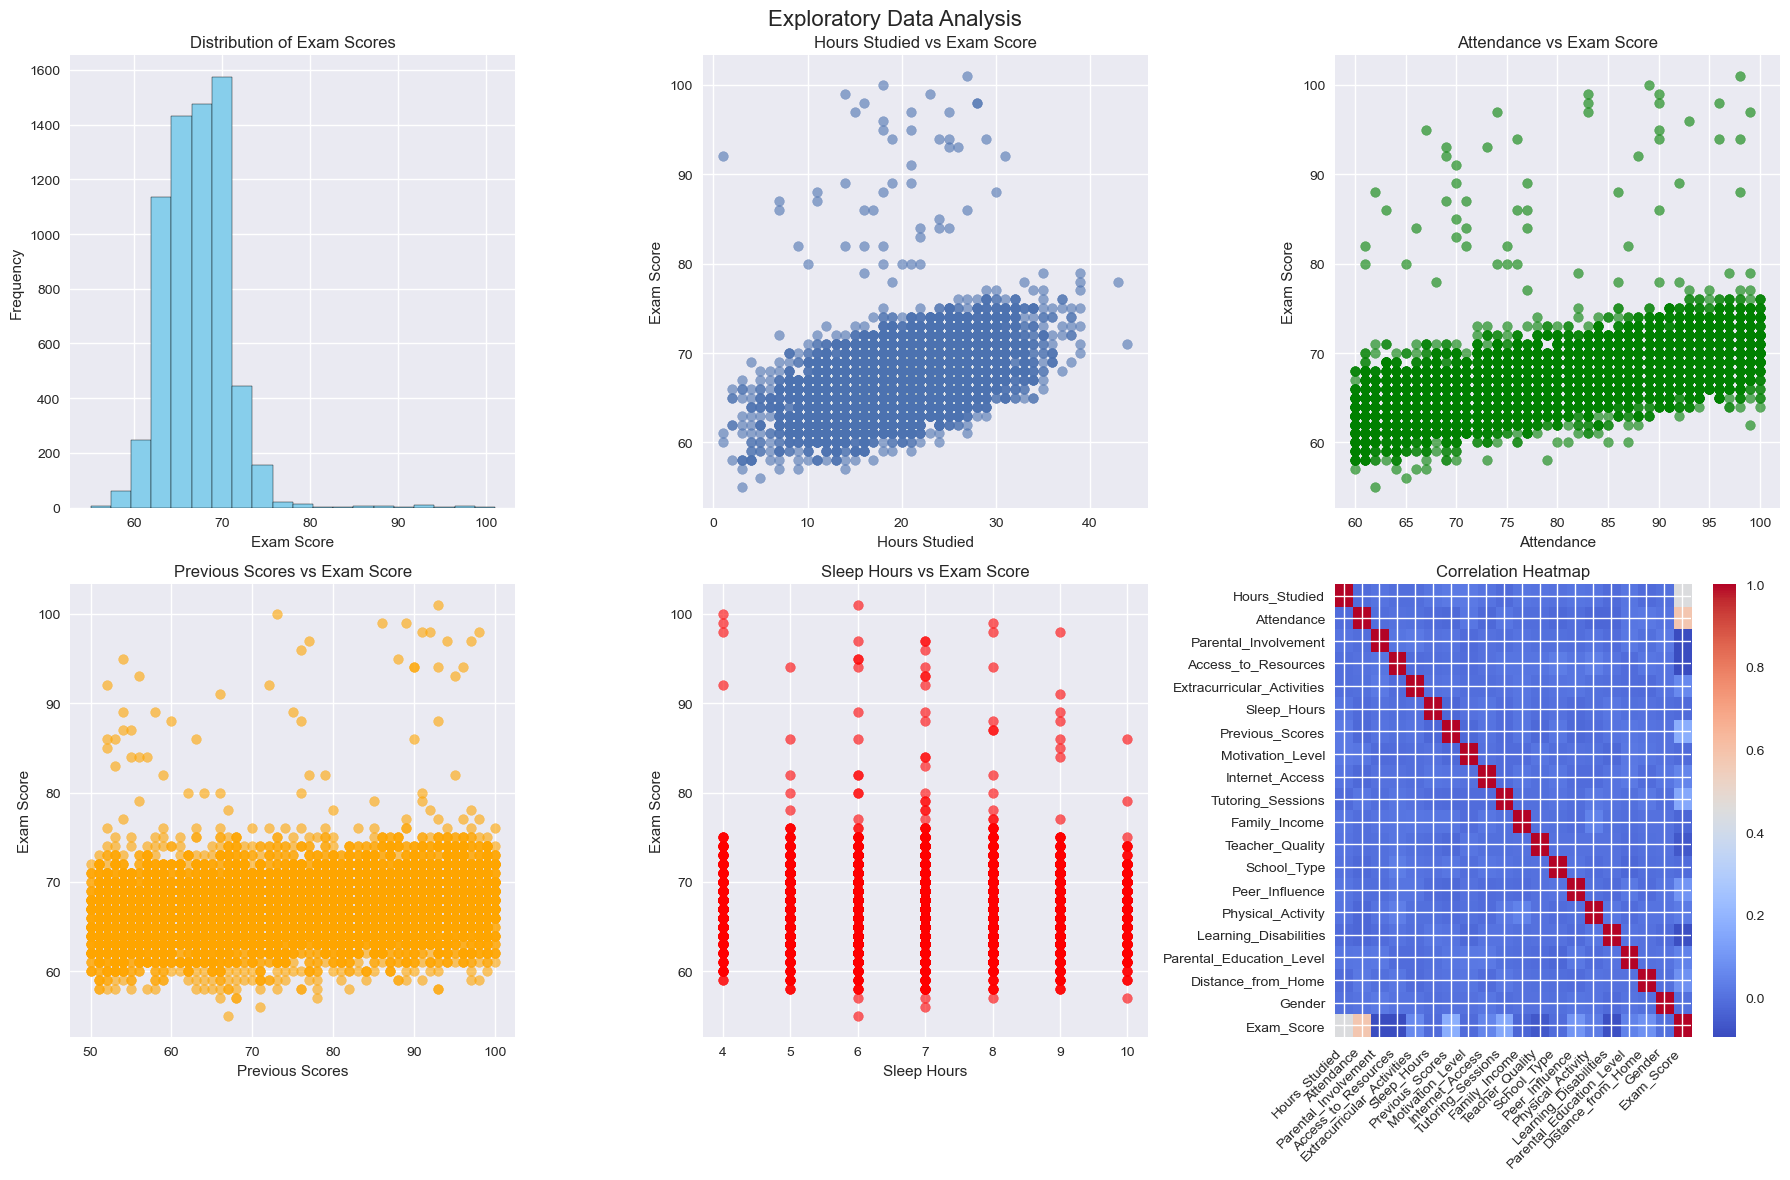

Correlation with Exam Score:
Exam_Score                    1.000000
Attendance                    0.581072
Hours_Studied                 0.445455
Previous_Scores               0.175079
Tutoring_Sessions             0.156525
Peer_Influence                0.100217
Distance_from_Home            0.088934
Extracurricular_Activities    0.064382
Internet_Access               0.051475
Parental_Education_Level      0.044574
Physical_Activity             0.027824
Gender                       -0.002032
School_Type                  -0.008844
Motivation_Level             -0.014910
Sleep_Hours                  -0.017022
Family_Income                -0.026484
Teacher_Quality              -0.060824
Learning_Disabilities        -0.085066
Access_to_Resources          -0.090503
Parental_Involvement         -0.094289
Name: Exam_Score, dtype: float64


In [13]:
# Step 4: Exploratory Data Analysis and Visualization

# Set up the visualization layout
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Exploratory Data Analysis', fontsize=16)

# 1. Distribution of Exam Scores
axes[0, 0].hist(df['Exam_Score'], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Exam Scores')
axes[0, 0].set_xlabel('Exam Score')
axes[0, 0].set_ylabel('Frequency')

# 2. Hours Studied vs Exam Score
axes[0, 1].scatter(df['Hours_Studied'], df['Exam_Score'], alpha=0.6)
axes[0, 1].set_title('Hours Studied vs Exam Score')
axes[0, 1].set_xlabel('Hours Studied')
axes[0, 1].set_ylabel('Exam Score')

# 3. Attendance vs Exam Score
axes[0, 2].scatter(df['Attendance'], df['Exam_Score'], alpha=0.6, color='green')
axes[0, 2].set_title('Attendance vs Exam Score')
axes[0, 2].set_xlabel('Attendance')
axes[0, 2].set_ylabel('Exam Score')

# 4. Previous Scores vs Exam Score
axes[1, 0].scatter(df['Previous_Scores'], df['Exam_Score'], alpha=0.6, color='orange')
axes[1, 0].set_title('Previous Scores vs Exam Score')
axes[1, 0].set_xlabel('Previous Scores')
axes[1, 0].set_ylabel('Exam Score')

# 5. Sleep Hours vs Exam Score
axes[1, 1].scatter(df['Sleep_Hours'], df['Exam_Score'], alpha=0.6, color='red')
axes[1, 1].set_title('Sleep Hours vs Exam Score')
axes[1, 1].set_xlabel('Sleep Hours')
axes[1, 1].set_ylabel('Exam Score')

# 6. Correlation Heatmap
# Calculate correlation only for numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_df.corr()
im = axes[1, 2].imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
axes[1, 2].set_title('Correlation Heatmap')
plt.colorbar(im, ax=axes[1, 2])

# Set tick labels for correlation matrix
axes[1, 2].set_xticks(range(len(correlation_matrix.columns)))
axes[1, 2].set_yticks(range(len(correlation_matrix.columns)))
axes[1, 2].set_xticklabels(correlation_matrix.columns, rotation=45, ha='right')
axes[1, 2].set_yticklabels(correlation_matrix.columns)

plt.tight_layout()
plt.show()

# Display correlation with target variable
print("Correlation with Exam Score:")
correlation_with_target = numerical_df.corr()['Exam_Score'].sort_values(ascending=False)
print(correlation_with_target)

In [14]:
#  data for modeling

X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (5285, 19)
Testing set shape: (1322, 19)


In [15]:
#Train and evaluate Linear Regression model

# Create and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print(f"MAE: {mae_lr:.4f}")
print(f"MSE: {mse_lr:.4f}")
print(f"R2 Score: {r2_lr:.4f}")

Linear Regression Performance:
MAE: 1.0155
MSE: 4.3993
R2 Score: 0.6888


In [16]:
# Polynomial Regression

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and train polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate the model
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression Performance:")
print(f"MAE: {mae_poly:.4f}")
print(f"MSE: {mse_poly:.4f}")
print(f"R2 Score: {r2_poly:.4f}")

Polynomial Regression Performance:
MAE: 0.5562
MSE: 3.4186
R2 Score: 0.7581


In [17]:
#  Experiment with different feature combinations

# 
top_features = correlation_with_target[1:6].index.tolist()  # excluding Exam_Score itself
print("Top 5 features:", top_features)

# Prepare data with top features
X_top = df[top_features]
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y, test_size=0.2, random_state=42)

# Train model with top features
lr_model_top = LinearRegression()
lr_model_top.fit(X_train_top, y_train_top)

# Make predictions
y_pred_top = lr_model_top.predict(X_test_top)

# Evaluate the model
mae_top = mean_absolute_error(y_test_top, y_pred_top)
mse_top = mean_squared_error(y_test_top, y_pred_top)
r2_top = r2_score(y_test_top, y_pred_top)

print("Linear Regression with Top 5 Features Performance:")
print(f"MAE: {mae_top:.4f}")
print(f"MSE: {mse_top:.4f}")
print(f"R2 Score: {r2_top:.4f}")

# Try without sleep hours (low correlation)
features_without_sleep = [col for col in X.columns if col != 'Sleep_Hours']
X_no_sleep = df[features_without_sleep]
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(X_no_sleep, y, test_size=0.2, random_state=42)

# Train model without sleep hours
lr_model_ns = LinearRegression()
lr_model_ns.fit(X_train_ns, y_train_ns)

# Make predictions
y_pred_ns = lr_model_ns.predict(X_test_ns)

# Evaluate the model
mae_ns = mean_absolute_error(y_test_ns, y_pred_ns)
mse_ns = mean_squared_error(y_test_ns, y_pred_ns)
r2_ns = r2_score(y_test_ns, y_pred_ns)

print("\nLinear Regression without Sleep Hours Performance:")
print(f"MAE: {mae_ns:.4f}")
print(f"MSE: {mse_ns:.4f}")
print(f"R2 Score: {r2_ns:.4f}")

Top 5 features: ['Attendance', 'Hours_Studied', 'Previous_Scores', 'Tutoring_Sessions', 'Peer_Influence']
Linear Regression with Top 5 Features Performance:
MAE: 1.2266
MSE: 4.9167
R2 Score: 0.6522

Linear Regression without Sleep Hours Performance:
MAE: 1.0142
MSE: 4.3918
R2 Score: 0.6893


Model Comparison:


Model       MAE       MSE  R2 Score
0    Linear Regression (All Features)  1.015549  4.399276  0.688769
1               Polynomial Regression  0.556228  3.418582  0.758149
2  Linear Regression (Top 5 Features)  1.226590  4.916691  0.652164
3  Linear Regression (No Sleep Hours)  1.014211  4.391775  0.689299

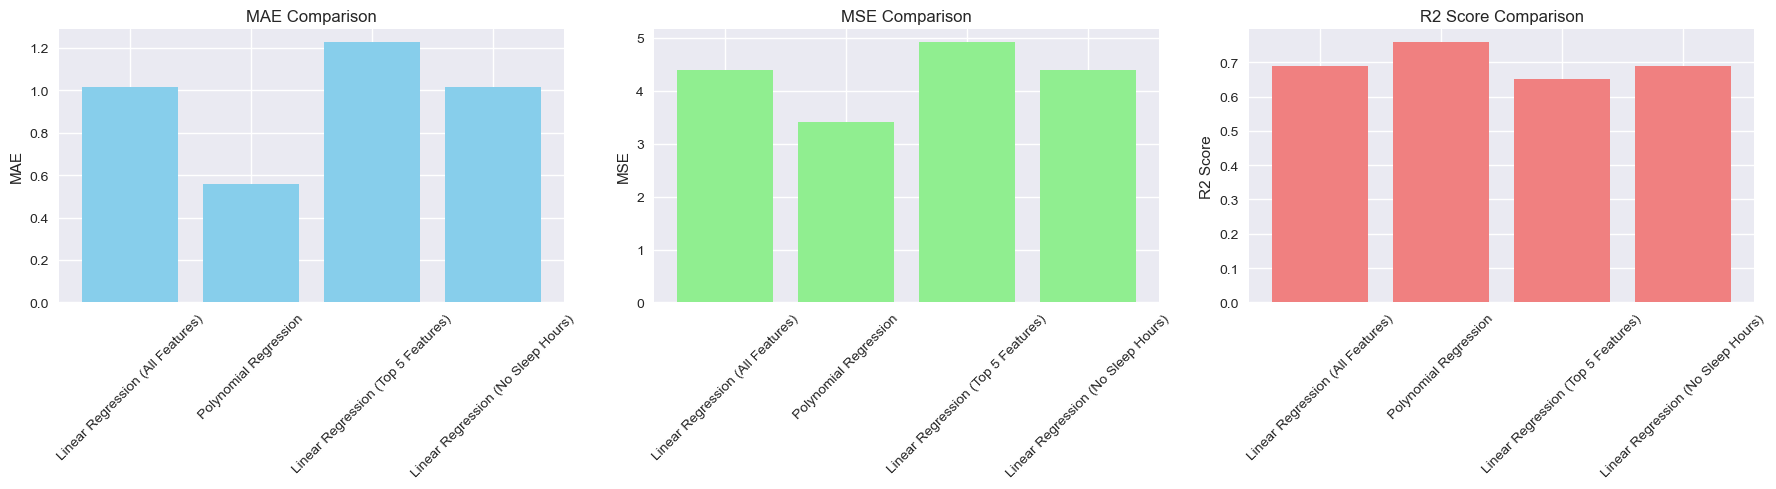

In [18]:
# Now we will Compare all models

models_comparison = pd.DataFrame({
    'Model': ['Linear Regression (All Features)', 'Polynomial Regression', 
              'Linear Regression (Top 5 Features)', 'Linear Regression (No Sleep Hours)'],
    'MAE': [mae_lr, mae_poly, mae_top, mae_ns],
    'MSE': [mse_lr, mse_poly, mse_top, mse_ns],
    'R2 Score': [r2_lr, r2_poly, r2_top, r2_ns]
})

print("Model Comparison:")
display(models_comparison)

# Visualize model comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# MAE Comparison
axes[0].bar(models_comparison['Model'], models_comparison['MAE'], color='skyblue')
axes[0].set_title('MAE Comparison')
axes[0].set_ylabel('MAE')
axes[0].tick_params(axis='x', rotation=45)

# MSE Comparison
axes[1].bar(models_comparison['Model'], models_comparison['MSE'], color='lightgreen')
axes[1].set_title('MSE Comparison')
axes[1].set_ylabel('MSE')
axes[1].tick_params(axis='x', rotation=45)

# R2 Score Comparison
axes[2].bar(models_comparison['Model'], models_comparison['R2 Score'], color='lightcoral')
axes[2].set_title('R2 Score Comparison')
axes[2].set_ylabel('R2 Score')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Best model: Polynomial Regression


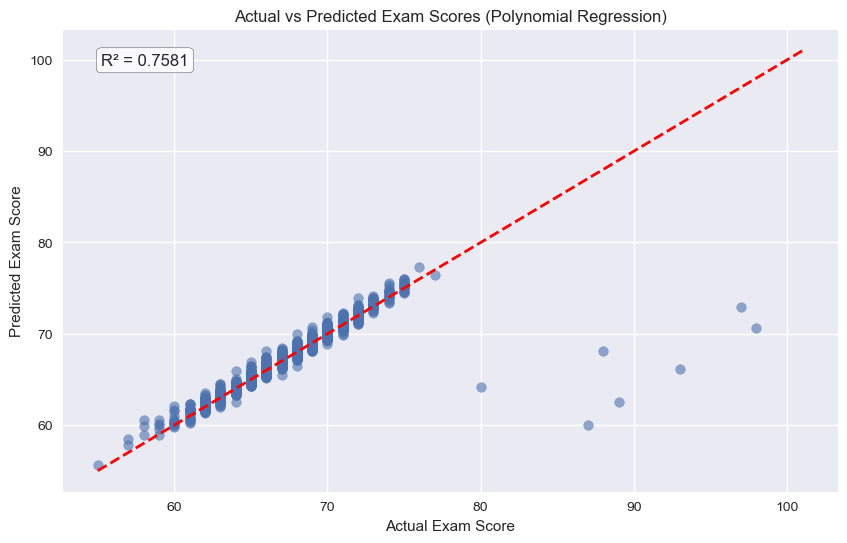

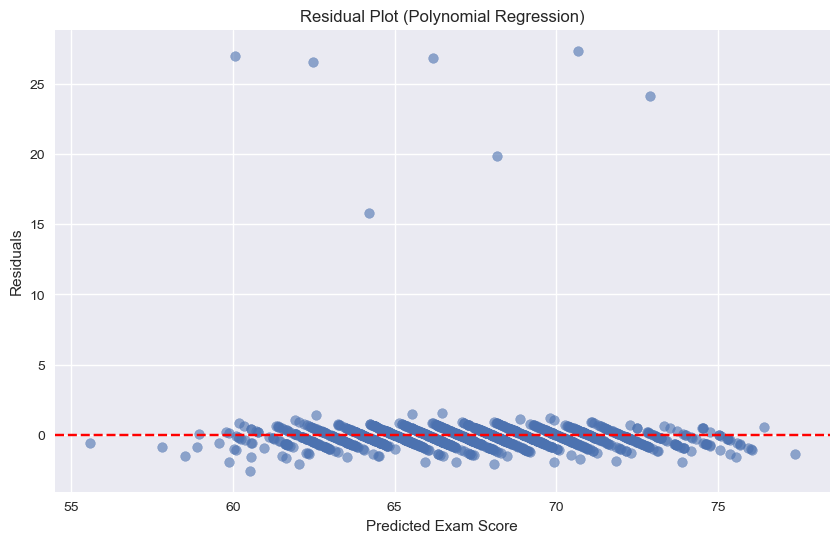

In [19]:
#  Visualize predictions vs actual values for the best model

# Determine the best model based on R2 score
best_model_idx = models_comparison['R2 Score'].idxmax()
best_model_name = models_comparison.loc[best_model_idx, 'Model']
print(f"Best model: {best_model_name}")

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))

if best_model_name == 'Linear Regression (All Features)':
    y_pred_best = y_pred_lr
elif best_model_name == 'Polynomial Regression':
    y_pred_best = y_pred_poly
elif best_model_name == 'Linear Regression (Top 5 Features)':
    y_pred_best = y_pred_top
else:
    y_pred_best = y_pred_ns

plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title(f'Actual vs Predicted Exam Scores ({best_model_name})')

# Add R2 score to plot
r2_best = r2_score(y_test, y_pred_best)
plt.text(0.05, 0.95, f'R² = {r2_best:.4f}', transform=plt.gca().transAxes, 
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.show()

# Residual plot
residuals = y_test - y_pred_best
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Exam Score')
plt.ylabel('Residuals')
plt.title(f'Residual Plot ({best_model_name})')
plt.show()

In [21]:
# Step 11: Feature importance for linear models

if best_model_name in ['Linear Regression (All Features)', 'Linear Regression (Top 5 Features)', 
                       'Linear Regression (No Sleep Hours)']:
    
    if best_model_name == 'Linear Regression (All Features)':
        model = lr_model
        features = X.columns
    elif best_model_name == 'Linear Regression (Top 5 Features)':
        model = lr_model_top
        features = top_features
    else:
        model = lr_model_ns
        features = features_without_sleep
    
    # Get feature importance (coefficients)
    importance = pd.DataFrame({
        'Feature': features,
        'Coefficient': model.coef_
    })
    importance = importance.sort_values('Coefficient', key=abs, ascending=False)
    
    print("Feature Importance:")
    display(importance)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(importance['Feature'], importance['Coefficient'], color='skyblue')
    plt.xlabel('Coefficient Value')
    plt.title('Feature Importance (Linear Regression Coefficients)')
    plt.tight_layout()
    plt.show()